# loading  the white wine and red wine datasets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import numpy as np

print("hello world")

hello world


In [3]:
# Load the red and white wine datasets from CSV files
# 'red.csv' contains data about red wine and 'white.csv' contains data about white wine.
red_wine = pd.read_csv('red.csv')
white_wine = pd.read_csv('white.csv')


# Combine data from both files and add color column, fill NaN values wiht mean value

In [4]:
# Add a 'color' column to distinguish between wine types in the combined dataset
# Assign '0' for red wine and '1' for white wine to help in binary classification later
red_wine['color'] = 0  # 0 represents red wine
white_wine['color'] = 1  # 1 represents white wine

# Combine the red and white wine datasets into a single dataset for processing
# Ignore the original indices to create a new unified index
wine_data = pd.concat([red_wine, white_wine], ignore_index=True)

# Handle missing values by replacing them with the mean of their respective columns
# This ensures that missing data does not negatively affect the training of the model
wine_data.fillna(wine_data.mean(), inplace=True)

# Plot Histogram of data

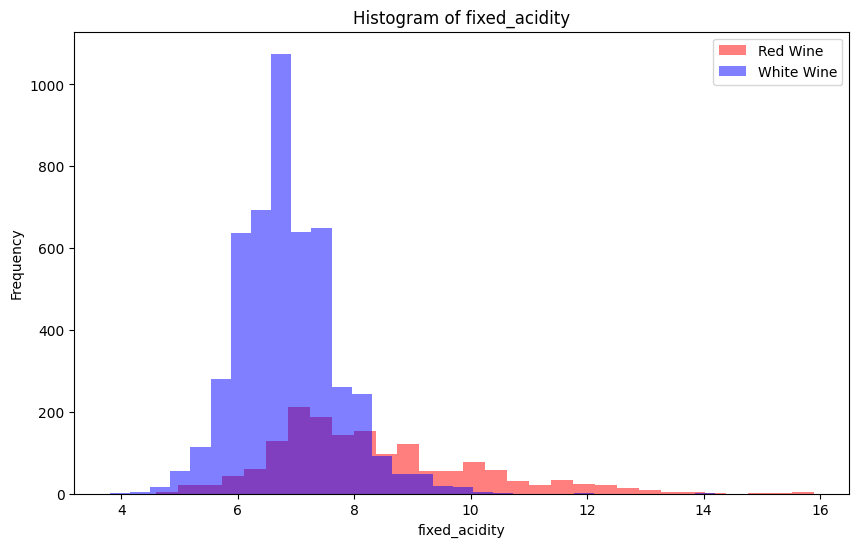

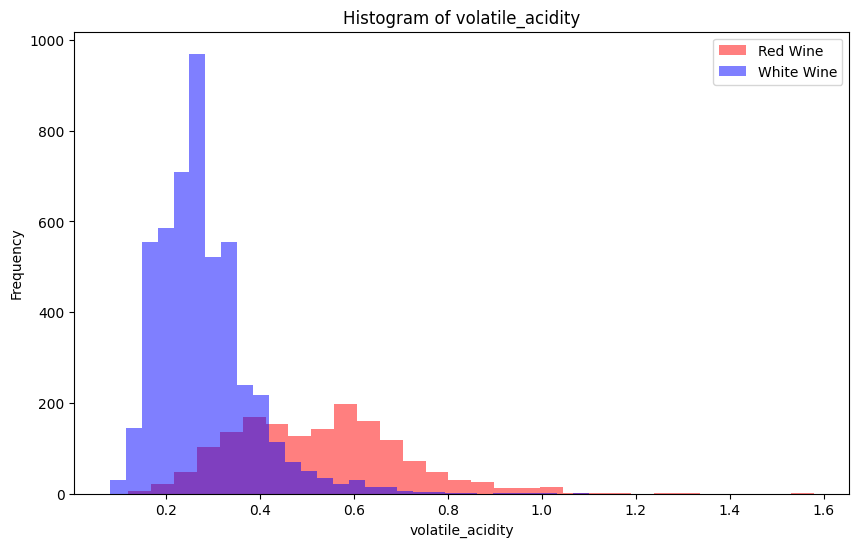

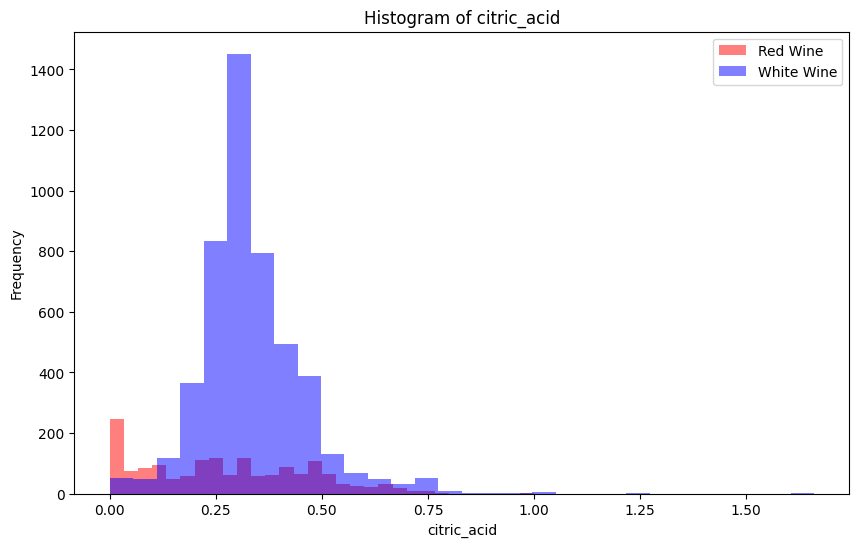

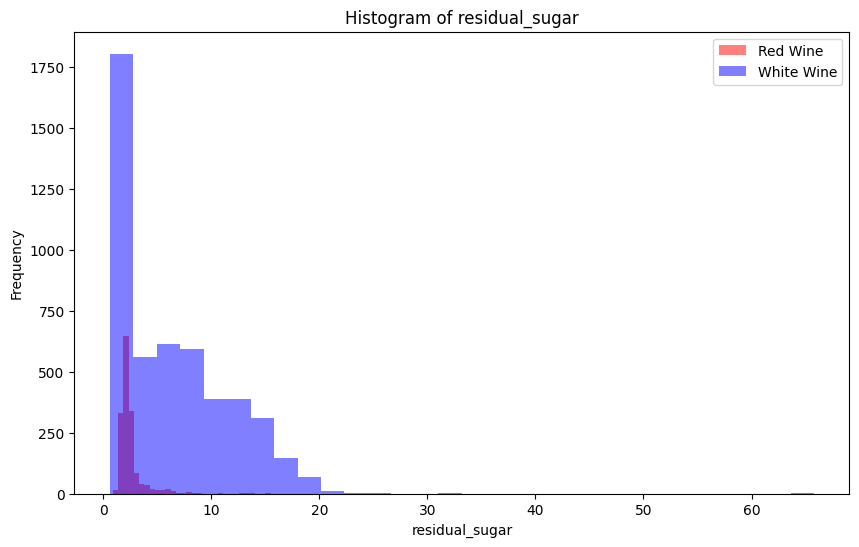

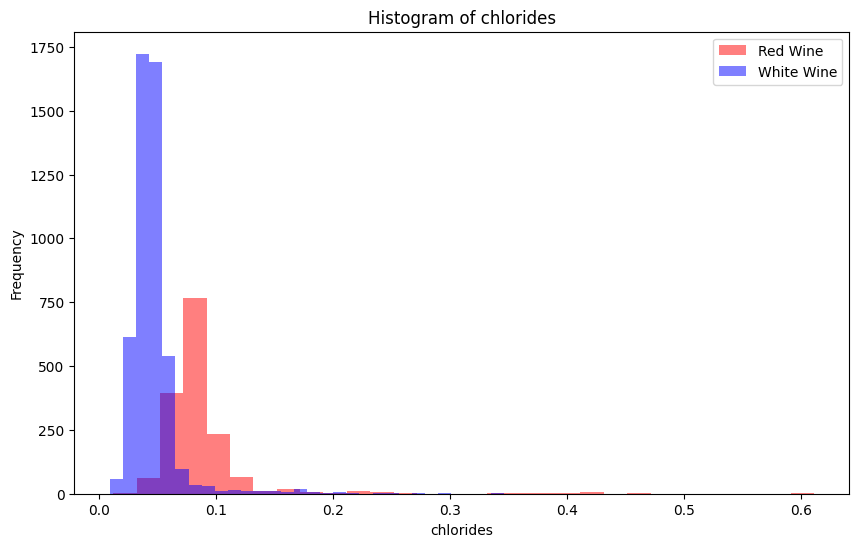

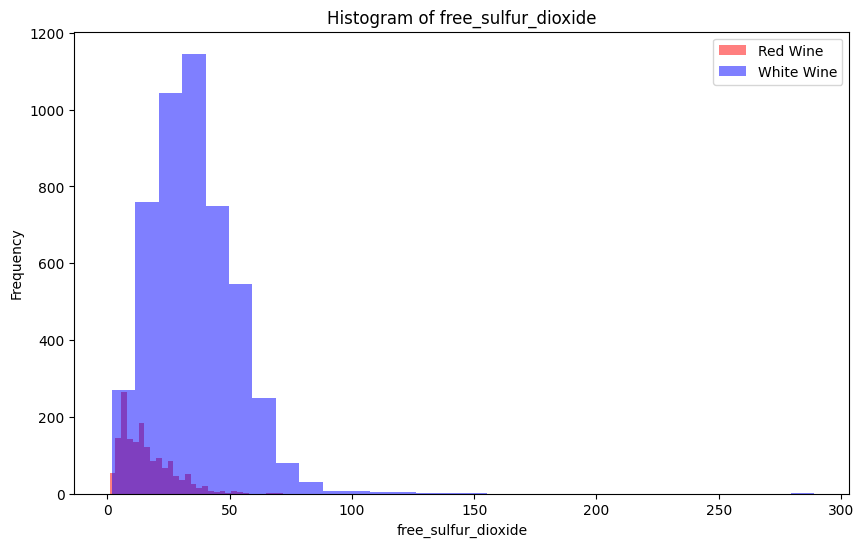

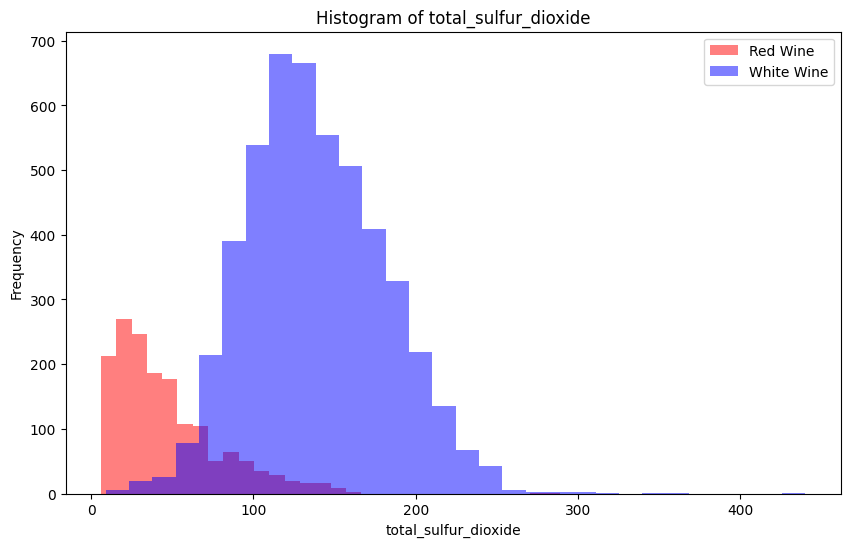

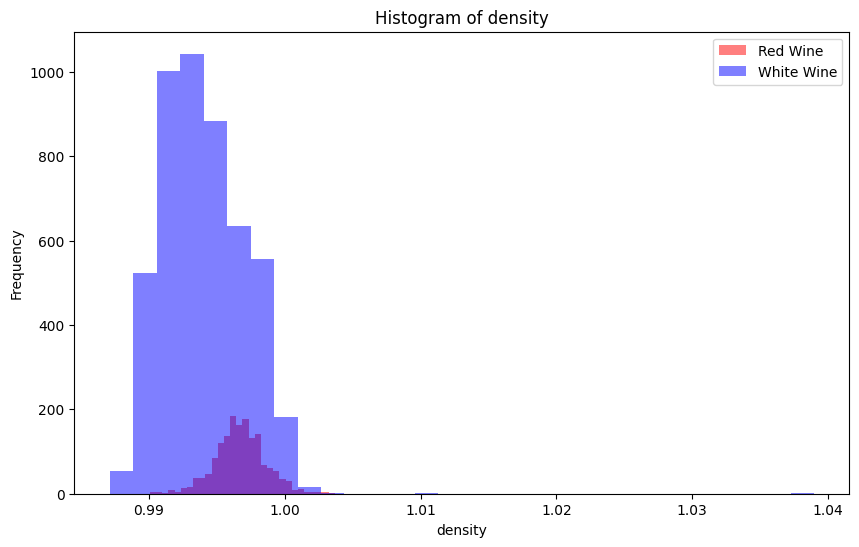

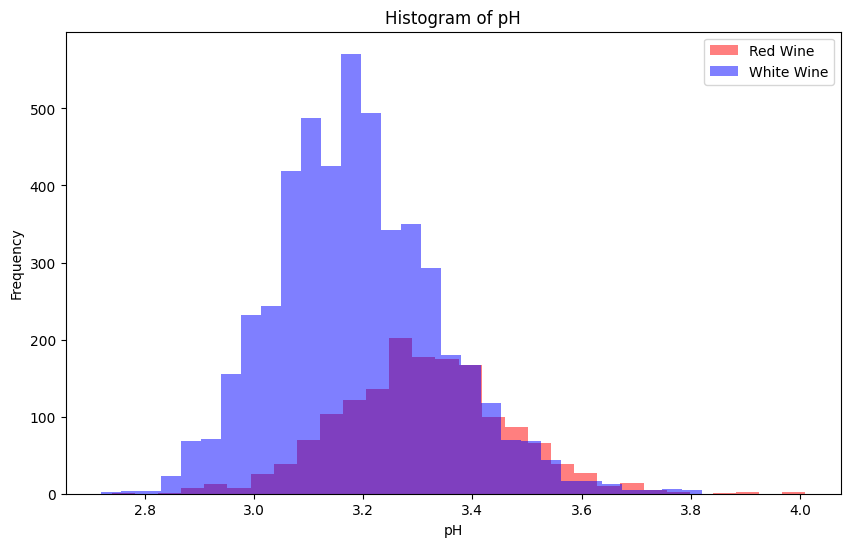

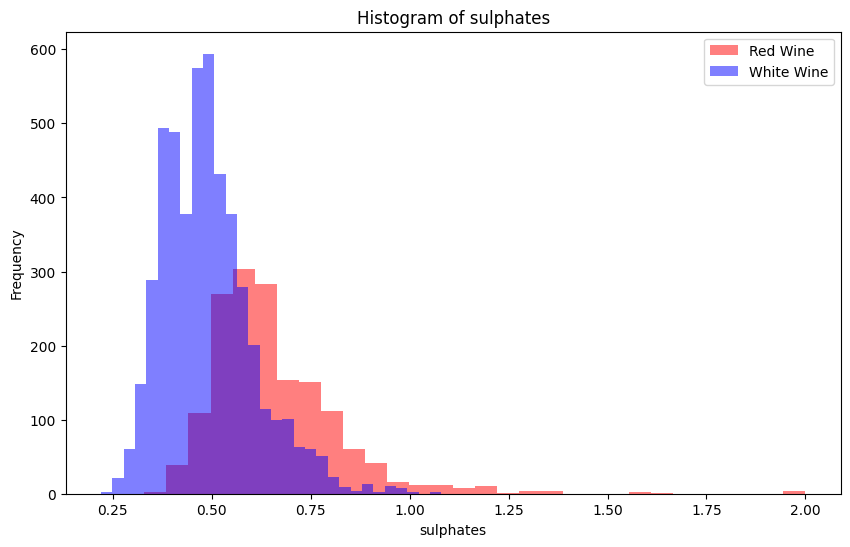

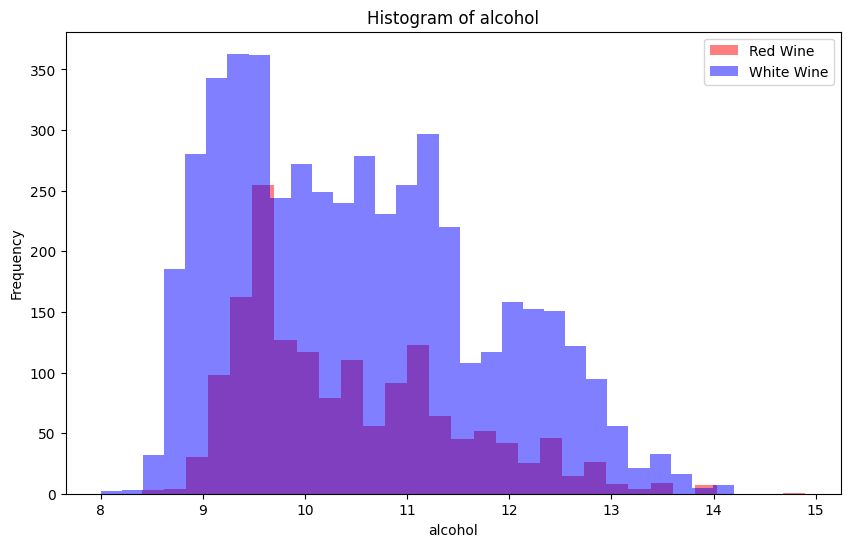

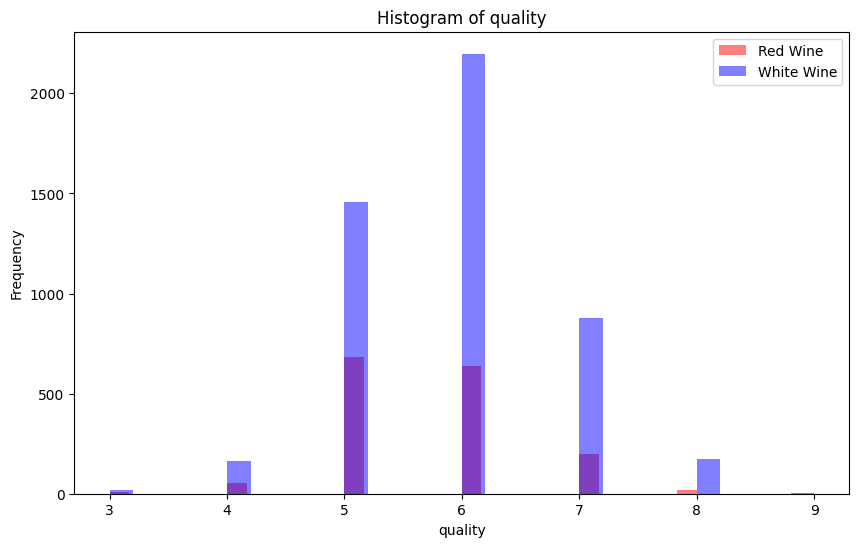

In [5]:
# Iterate over each column (excluding 'color') to plot histograms
for column in wine_data.columns:
    if column != 'color':  # Skip the 'color' column
        plt.figure(figsize=(10, 6))

        # Plot the histogram for red wine
        red_wine[column].plot(kind='hist', bins=30, alpha=0.5, color='red', label='Red Wine')

        # Plot the histogram for white wine
        white_wine[column].plot(kind='hist', bins=30, alpha=0.5, color='blue', label='White Wine')

        # Add labels, title, and legend
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.legend()

        # Save the plot as a PNG file
        plt.savefig(f'{column}_histogram.png')

        # Display the plot
        #plt.show()  #uncomment to see histograms here

# Prepare training data (X) and labels (Y), labels can be color or wine quality

In [6]:
# Define the target column for classification
# The target can either be 'color' for binary classification (red vs. white wine)
# or 'quality' for multi-class classification (wine quality on a numeric scale)
target_column = 'quality'  # Change to 'quality' if multi-class classification is desired

# Separate features (X) and target (y)
# The features are all columns except 'color' and 'quality', depending on the target
# The target is the column defined above, either 'color' or 'quality'
X = wine_data.drop(columns=['color', 'quality'])
y = wine_data[target_column]

# Standardize the features to bring them to the same scale
# This helps the neural network model to converge faster and more reliably
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80% train, 20% test)
# A random state is used for reproducibility of the results
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create Classifier and apply to test data

In [9]:
# Create and train the neural network classifier using Multi-Layer Perceptron (MLP)
# We use two hidden layers with 100 neurons each, a maximum of 500 iterations, and a random state for reproducibility
mlp = MLPClassifier(hidden_layer_sizes=(200, 200, 200), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions on the test set using the trained model
y_pred = mlp.predict(X_test)

# Display additional details about the trained neural network model
print("\nNeural Network Details:")
# Number of layers in the neural network, including input, hidden, and output layers
print(f"Number of layers: {mlp.n_layers_}")
# Number of outputs, corresponding to the number of classes in the target variable
print(f"Number of outputs: {mlp.n_outputs_}")
# Size of the hidden layers used in the network
print(f"Hidden layer sizes: {mlp.hidden_layer_sizes}")
# Number of iterations the model went through before stopping training
print(f"Number of iterations completed: {mlp.n_iter_}")
# The final loss value after training, which helps gauge model convergence
print(f"Loss after training: {mlp.loss_:.4f}")
# Indicates whether the model converged within the specified maximum iterations
print(f"Convergence status: {'Converged' if mlp.n_iter_ < mlp.max_iter else 'Not converged'}")



Neural Network Details:
Number of layers: 5
Number of outputs: 7
Hidden layer sizes: (200, 200, 200)
Number of iterations completed: 170
Loss after training: 0.0555
Convergence status: Converged


# Compare predicted labels with grount truth labels

In [10]:
# Calculate evaluation metrics for the model's performance
# Metrics include accuracy, precision, recall, and a confusion matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the calculated metrics to understand the model's performance
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.62
Precision: 0.63
Recall: 0.62

Confusion Matrix:
[[  3   0   3   0   0   0   0]
 [  3  11  20   8   0   1   0]
 [  1  17 291  81  10   2   0]
 [  0  10 165 370  47   5   0]
 [  1   4  16  66 119   9   0]
 [  0   0   1  12  10  13   0]
 [  0   0   0   0   1   0   0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.38      0.50      0.43         6
           4       0.26      0.26      0.26        43
           5       0.59      0.72      0.65       402
           6       0.69      0.62      0.65       597
           7       0.64      0.55      0.59       215
           8       0.43      0.36      0.39        36
           9       0.00      0.00      0.00         1

    accuracy                           0.62      1300
   macro avg       0.43      0.43      0.42      1300
weighted avg       0.63      0.62      0.62      1300

